In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import ttest_ind, chi2_contingency
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd
import sys
sys.path.append('../src')
from functions import *
import seaborn as sns
# raw data
df_clients_profile = pd.read_csv('../Data/Raw/df_final_demo.txt')
df_web_data_1 = pd.read_csv('../Data/Raw/df_final_web_data_pt_1.txt')
df_web_data_2 = pd.read_csv('../Data/Raw/df_final_web_data_pt_2.txt')
df_experiment_clients = pd.read_csv('../Data/Raw/df_final_experiment_clients.txt')
# processed data
df_test = pd.read_csv('../Data/Cleaned_Data/df_test.csv')
df_test_final = pd.read_csv('../Data/Cleaned_Data/df_test_final.csv')
df_control = pd.read_csv('../Data/Cleaned_Data/df_control.csv')
df_control_final = pd.read_csv('../Data/Cleaned_Data/df_control_final.csv')
df_final = pd.read_csv('../Data/Cleaned_Data/df_final.csv')
df_combined = pd.read_csv('../Data/Cleaned_Data/df_combined.csv')
pd.set_option('display.max_columns', None)
df_web_data = pd.concat([df_web_data_1, df_web_data_2], ignore_index= True)

In [3]:
df_test = convert_data_types_combined(df_test)
df_test_final = convert_data_types_combined(df_test_final)
df_control = convert_data_types_combined(df_control)
df_control_final = convert_data_types_combined(df_control_final)
df_final = convert_data_types_combined(df_final)
df_combined = convert_data_types_combined(df_combined)

# Loading the Data

In [4]:
df_test_final = pd.read_csv('../Data/Cleaned_Data/df_test_final.csv')
df_control_final = pd.read_csv('../Data/Cleaned_Data/df_control_final.csv')
pd.set_option('display.max_columns', None)

# df_control

## Check the data types

In [5]:
df_control_final.dtypes

client_id                      int64
visit_visitor_id              object
start_time                   float64
step_1                       float64
step_2                       float64
step_3                       float64
time_completion              float64
navigations_bt_start_last      int64
completion                     int64
start_step                     int64
1st_step                       int64
2nd_step                       int64
3rd_step                       int64
last_step                     object
variation                     object
clnt_tenure_yr                 int64
clnt_tenure_mnth               int64
clnt_age                       int64
gendr                         object
num_accts                      int64
bal                          float64
calls_6_mnth                   int64
logons_6_mnth                  int64
date                          object
initial_date                  object
total_time_visit             float64
final_date                    object
d

## Categorical columns

In [6]:
df_control_final

,client_id,visit_visitor_id,start_time,step_1,step_2,step_3,time_completion,navigations_bt_start_last,completion,start_step,1st_step,2nd_step,3rd_step,last_step,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,date,initial_date,total_time_visit,final_date
0,1028,557292053_87239438319_391157_42237450_62128060588,0.816667,1.566667,4.733333,1.850000,0.0,10,0,1,5,2,1,step_1,Control,12,145,36,M,3,103520.22,1,4,2017-04-08,2017-04-08 18:51:28,8.966667,2017-04-08 19:00:26
1,1104,543158812_46395476577_767725_194240915_1815800...,0.000000,0.000000,0.000000,0.000000,0.0,2,0,1,0,0,0,start,Control,5,66,48,Other,3,154643.94,6,9,2017-06-12,2017-06-12 07:49:18,0.000000,2017-06-12 07:49:18
2,1104,643221571_99977972121_69283_194240915_18158000533,0.000000,0.000000,0.000000,0.000000,0.0,2,0,1,0,0,0,start,Control,5,66,48,Other,3,154643.94,6,9,2017-06-20,2017-06-20 22:31:33,0.000000,2017-06-20 22:31:33
3,1186,507052512_11309370126_442139_446844663_3161510...,0.000000,0.000000,0.000000,0.000000,0.0,2,0,1,0,0,0,start,Control,8,99,22,Other,2,31662.52,0,3,2017-04-08,2017-04-08 15:59:16,0.000000,2017-04-08 15:59:16
4,1186,795373564_99931517312_810896_446844663_3161510...,0.183333,0.183333,0.000000,0.000000,0.0,4,0,1,1,1,0,step_2,Control,8,99,22,Other,2,31662.52,0,3,2017-04-08,2017-04-08 18:05:02,0.366667,2017-04-08 18:05:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32230,9997470,655572400_94971272893_411965_91394485_75296404278,0.000000,0.000000,0.000000,0.000000,0.0,2,0,1,0,0,0,start,Control,6,82,36,Other,2,53543.03,0,3,2017-04-07,2017-04-07 16:11:03,0.000000,2017-04-07 16:11:03
32231,9997470,761490147_96352537762_21814_395791369_55562604618,2.816667,4.383333,2.016667,34.550000,0.0,15,1,6,4,2,2,confirm,Control,6,82,36,Other,2,53543.03,0,3,2017-05-09,2017-05-09 15:55:48,43.766667,2017-05-09 16:39:34
32232,9997470,904791598_9725982898_416914_395791369_55562604618,0.000000,0.000000,0.000000,0.000000,0.0,2,0,1,0,0,0,start,Control,6,82,36,Other,2,53543.03,0,3,2017-04-20,2017-04-20 20:04:38,0.000000,2017-04-20 20:04:38
32233,9998346,189177304_69869411700_783154_292425655_1660713...,1.033333,1.016667,1.450000,8.966667,0.0,12,1,1,2,4,4,step_3,Control,50,602,61,F,2,149881.38,6,9,2017-03-29,2017-03-29 15:25:00,12.466667,2017-03-29 15:37:28


In [7]:
# Extracting column names with numerical data types from the dataframe
df_control_final.select_dtypes("object").columns


Index(['visit_visitor_id', 'last_step', 'variation', 'gendr', 'date',
       'initial_date', 'final_date'],
      dtype='object')

In [8]:
test_categorical_columns = ['last_step', 'gendr',]

In [9]:
# Extracting column names with numerical data types from the dataframe
df_control_final.select_dtypes("object").nunique().sort_values(ascending=False)

visit_visitor_id    32181
final_date          31838
initial_date        31825
date                   98
last_step               5
gendr                   3
variation               1
dtype: int64

In [10]:
frequency_proportion(df_control_final, 'last_step')

Frequency:last_step
confirm    15381
start       9644
step_1      3498
step_3      2252
step_2      1460
Name: count, dtype: int64
Proportion: last_step
confirm    0.477152
start      0.299178
step_1     0.108516
step_3     0.069862
step_2     0.045292
Name: proportion, dtype: float64


In [11]:
frequency_proportion(df_control_final, 'gendr')

Frequency:gendr
M        11094
Other    10699
F        10442
Name: count, dtype: int64
Proportion: gendr
M        0.344160
Other    0.331906
F        0.323934
Name: proportion, dtype: float64


In [12]:
cross_table(df_control_final, 'start_time')

,start_time,count
0,0.000000,6335
1,0.016667,84
2,0.033333,78
3,0.050000,279
4,0.066667,616
...,...,...
1430,104.583333,1
1431,113.300000,1
1432,147.216667,1
1433,187.016667,1


In [13]:
frequency_proportion(df_control_final, 'start_time')

Frequency:start_time
0.000000     6335
0.150000      826
0.166667      794
0.133333      790
0.100000      761
             ... 
23.883333       1
28.700000       1
5.466667        1
8.166667        1
33.583333       1
Name: count, Length: 1435, dtype: int64
Proportion: start_time
0.000000     0.196526
0.150000     0.025624
0.166667     0.024632
0.133333     0.024508
0.100000     0.023608
               ...   
23.883333    0.000031
28.700000    0.000031
5.466667     0.000031
8.166667     0.000031
33.583333    0.000031
Name: proportion, Length: 1435, dtype: float64


In [14]:
tab_control_last_step = cross_table(df_control_final, 'last_step')
tab_control_last_step

,last_step,count
0,confirm,15381
1,start,9644
2,step_1,3498
3,step_2,1460
4,step_3,2252


In [15]:
df_control_final['last_step'].value_counts()

last_step
confirm    15381
start       9644
step_1      3498
step_3      2252
step_2      1460
Name: count, dtype: int64

In [16]:
tab_control_last_step = df_control_final['last_step'].value_counts().reset_index()
tab_control_last_step.columns = ['last_step', 'count']
tab_control_last_step

,last_step,count
0,confirm,15381
1,start,9644
2,step_1,3498
3,step_3,2252
4,step_2,1460


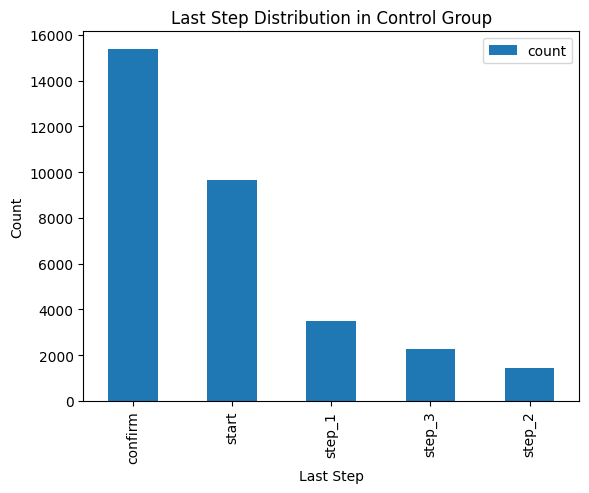

In [17]:
tab_control_last_step.plot(x='last_step', y='count', kind='bar')
plt.xlabel('Last Step')
plt.ylabel('Count')
plt.title('Last Step Distribution in Control Group')
plt.show()

In [18]:
tab_control_gender = cross_table(df_control_final, 'gendr')
tab_control_gender

,gendr,count
0,F,10442
1,M,11094
2,Other,10699


In [19]:
# Calculating the proportions for each value in 'tab_test_last_step' and rounding the results to two decimal places
(tab_control_gender['count'] / tab_control_gender['count'].sum()).round(2)

0    0.32
1    0.34
2    0.33
Name: count, dtype: float64

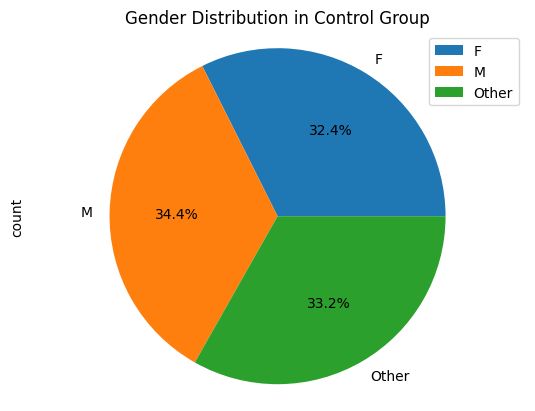

In [20]:
tab_control_gender.plot.pie(y='count', labels=tab_control_gender['gendr'], autopct='%1.1f%%')
plt.title('Gender Distribution in Control Group')
plt.axis('equal')
plt.show()

## Numerical columns

## Check the data types

### Centrality and Dispersion Measures

In [21]:
# Extracting column names with numerical data types from the dataframe
control_numerical_columns = df_control_final.select_dtypes("number").columns
print(control_numerical_columns)
print(df_control_final.dtypes)

Index(['client_id', 'start_time', 'step_1', 'step_2', 'step_3',
       'time_completion', 'navigations_bt_start_last', 'completion',
       'start_step', '1st_step', '2nd_step', '3rd_step', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth',
       'logons_6_mnth', 'total_time_visit'],
      dtype='object')
client_id                      int64
visit_visitor_id              object
start_time                   float64
step_1                       float64
step_2                       float64
step_3                       float64
time_completion              float64
navigations_bt_start_last      int64
completion                     int64
start_step                     int64
1st_step                       int64
2nd_step                       int64
3rd_step                       int64
last_step                     object
variation                     object
clnt_tenure_yr                 int64
clnt_tenure_mnth               int64
clnt_age             

In [22]:
control_numerical_columns = ['start_time', 'step_1', 'step_2', 'step_3', 'time_completion',
       'navigations_bt_start_last', 'start_step', '1st_step', '2nd_step',
       '3rd_step', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth',
       'total_time_visit']
print(control_numerical_columns)

['start_time', 'step_1', 'step_2', 'step_3', 'time_completion', 'navigations_bt_start_last', 'start_step', '1st_step', '2nd_step', '3rd_step', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'total_time_visit']


In [23]:
# Extracting column names with numerical data types from the dataframe
df_control_final.select_dtypes("number").nunique().sort_values(ascending=False)

client_id                    23526
bal                          23488
total_time_visit              1958
start_time                    1435
step_3                        1299
step_2                         962
step_1                         881
time_completion                457
clnt_tenure_mnth               443
clnt_age                        79
clnt_tenure_yr                  52
navigations_bt_start_last       34
start_step                      20
2nd_step                        16
3rd_step                        15
1st_step                        12
completion                      10
calls_6_mnth                     7
logons_6_mnth                    7
num_accts                        6
dtype: int64

In [24]:
df_control_final.describe()

,client_id,start_time,step_1,step_2,step_3,time_completion,navigations_bt_start_last,completion,start_step,1st_step,2nd_step,3rd_step,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth,total_time_visit
count,3.223500e+04,32235.000000,32235.000000,32235.000000,32235.000000,32235.000000,32235.000000,32235.000000,32235.000000,32235.000000,32235.000000,32235.000000,32235.000000,32235.000000,32235.000000,32235.000000,3.223500e+04,32235.000000,32235.000000,32235.000000
mean,5.020620e+06,1.234396,0.679452,1.156257,1.437197,0.167418,4.906003,0.542826,1.476315,0.920025,0.802761,0.706902,12.343881,154.115061,48.456336,2.281216,1.631135e+05,3.335226,6.371646,4.674720
std,2.870872e+06,5.621819,2.854033,2.864852,3.417656,2.322744,2.631791,0.636612,1.211958,0.812354,0.851475,0.807662,7.045203,84.154800,15.795884,0.563732,3.146467e+05,2.192733,2.180020,8.826849
min,1.028000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,33.000000,17.000000,2.000000,2.378961e+04,0.000000,3.000000,0.000000
25%,2.532372e+06,0.083333,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.000000,82.000000,35.000000,2.000000,4.172376e+04,1.000000,4.000000,0.366667
50%,5.034038e+06,0.283333,0.183333,0.650000,0.350000,0.000000,5.000000,0.000000,1.000000,1.000000,1.000000,1.000000,11.000000,141.000000,50.000000,2.000000,7.019437e+04,3.000000,6.000000,2.650000
75%,7.479669e+06,0.800000,0.616667,1.566667,1.533333,0.000000,6.000000,1.000000,2.000000,1.000000,1.000000,1.000000,16.000000,196.000000,61.000000,2.000000,1.541871e+05,6.000000,9.000000,5.675000
max,9.998921e+06,699.283333,268.300000,362.716667,121.133333,156.600000,81.000000,9.000000,32.000000,16.000000,24.000000,24.000000,55.000000,669.000000,96.000000,7.000000,8.292996e+06,6.000000,9.000000,699.416667


In [25]:
# Filtering the numerical columns for analysis
df_numerical_control = pd.DataFrame(df_control_final[control_numerical_columns])

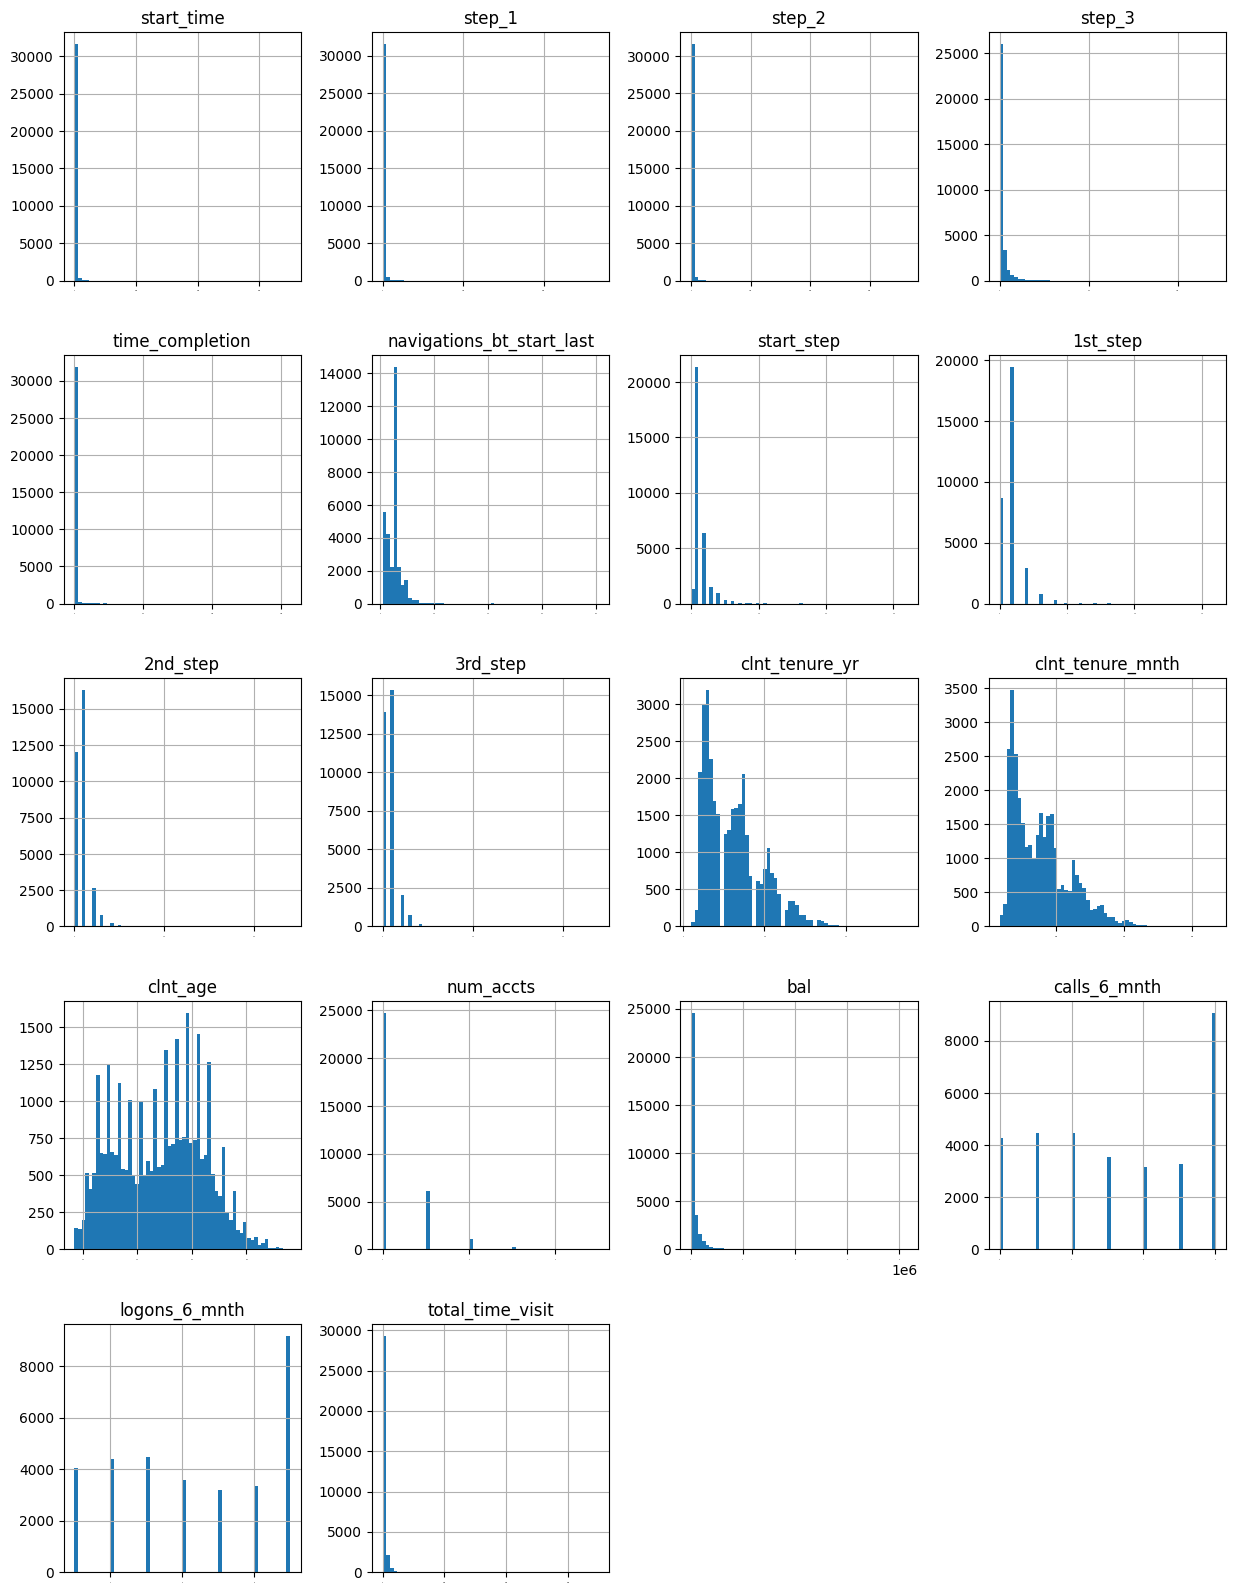

In [26]:
# Plotting histograms for the numerical columns before removing outliers
df_numerical_control.hist(figsize=(15, 20), bins=60, xlabelsize=1, ylabelsize=10);

In [27]:
# Applying IQR method to each specified column
for column in control_numerical_columns:
    df_control_final = remove_outliers_iqr(df_control_final, column)
    df_numerical_control = pd.DataFrame(df_control_final[control_numerical_columns])

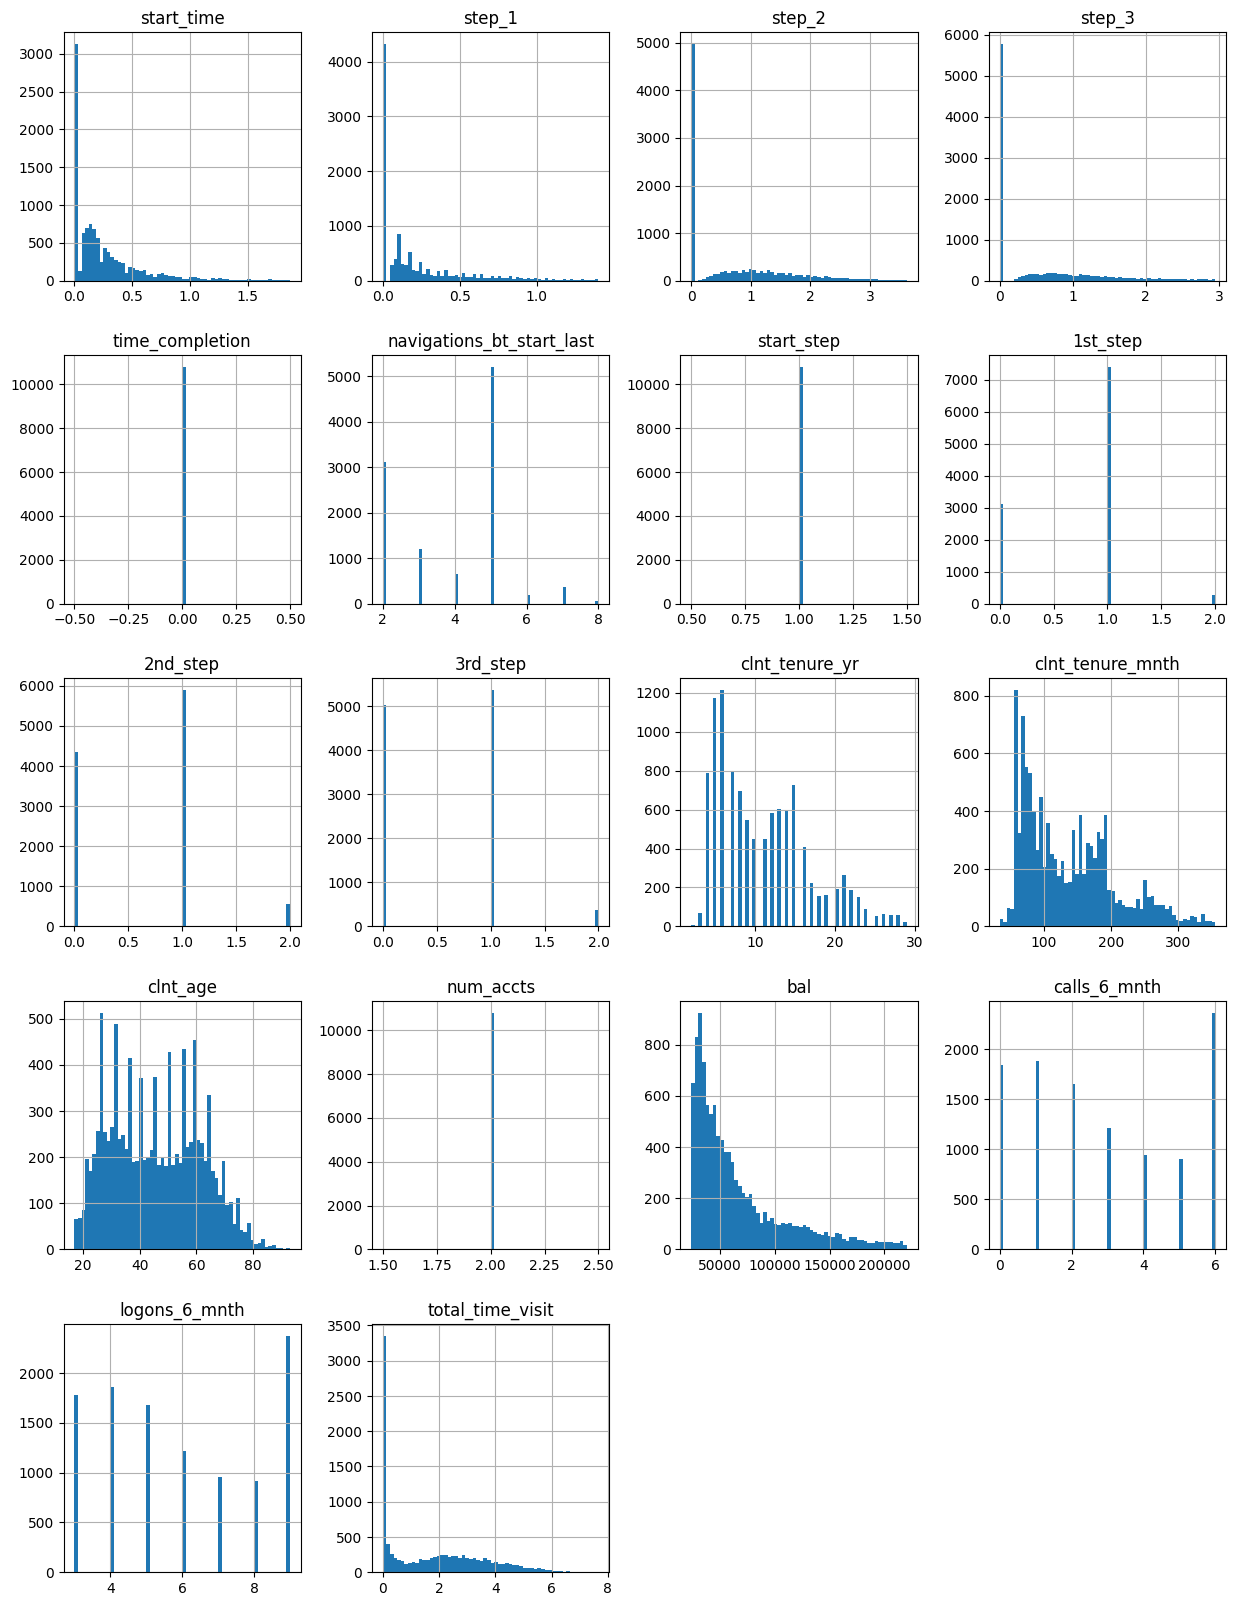

In [28]:
# Plotting histograms for the numerical columns after removing outliers
df_numerical_control.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

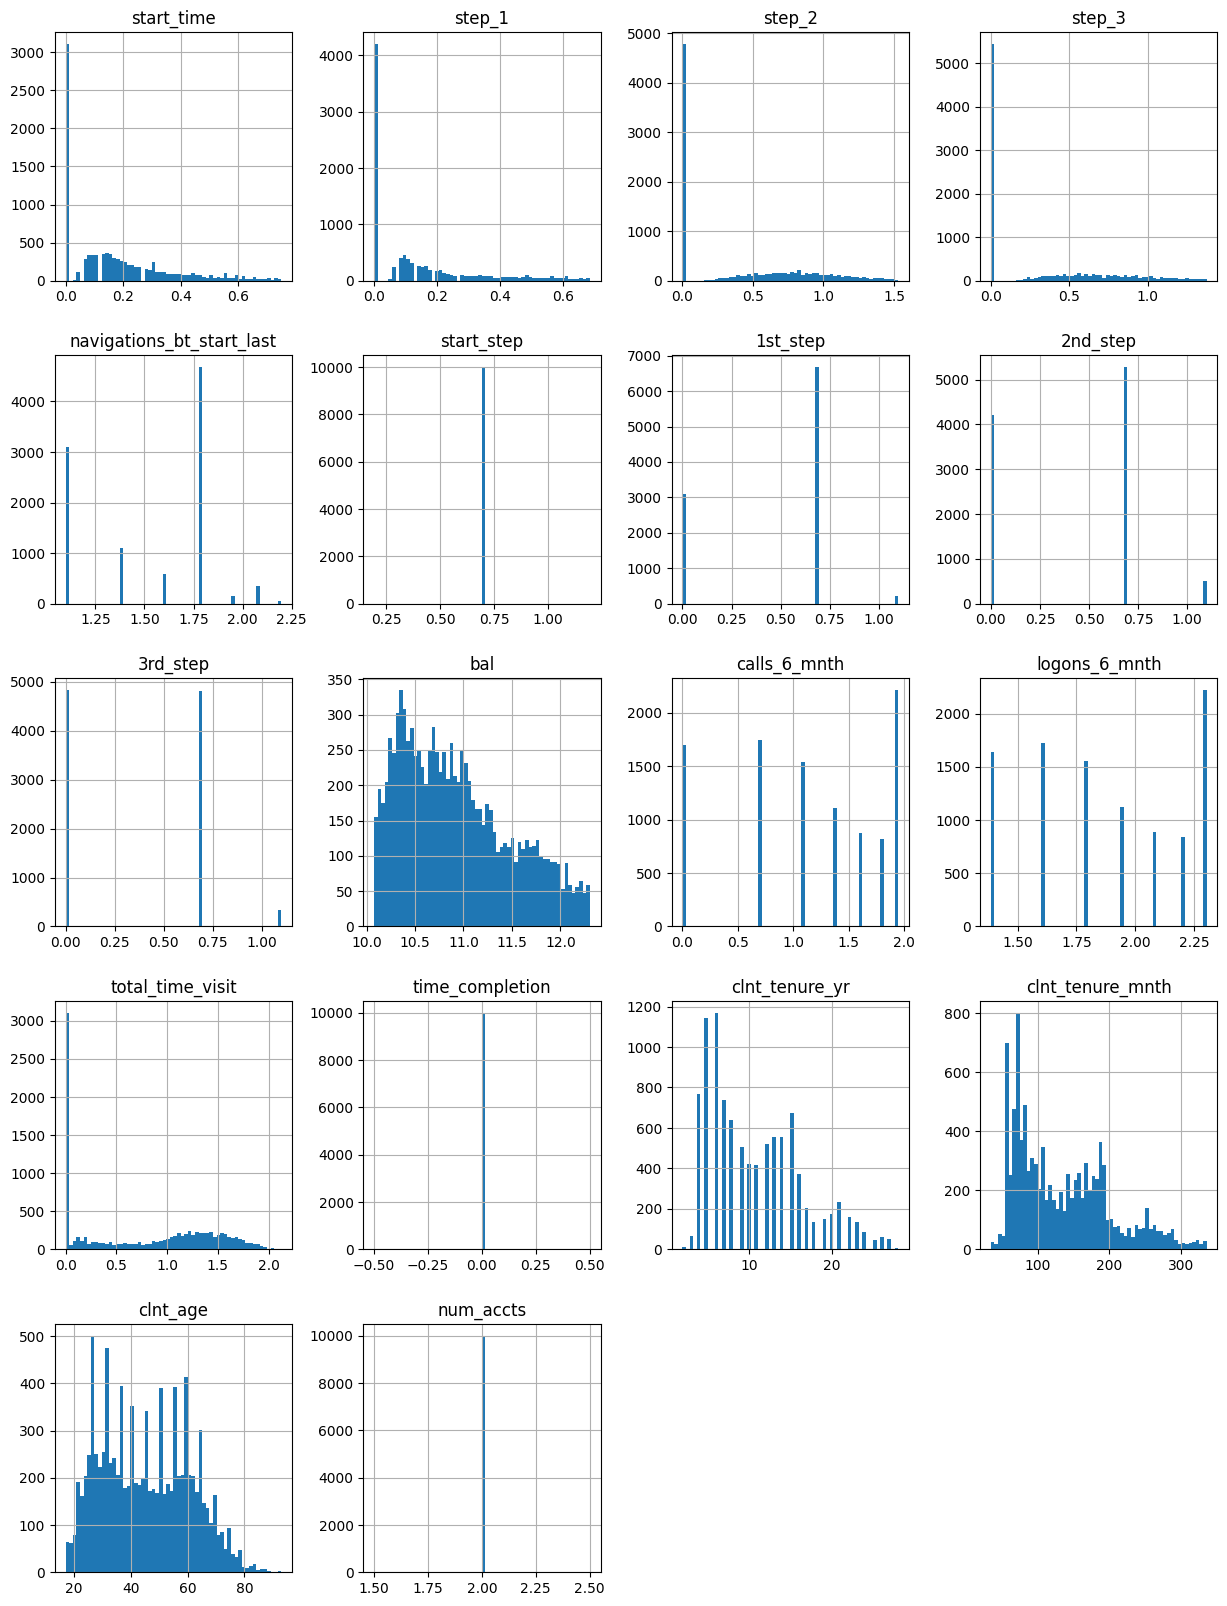

In [29]:
# List of columns to apply log transformation
log_transform_columns = [
    'start_time', 'step_1', 'step_2', 'step_3', 'navigations_bt_start_last',
    'start_step', '1st_step', '2nd_step', '3rd_step', 'bal',
    'calls_6_mnth', 'logons_6_mnth', 'total_time_visit'
]
# Applying log transformation
for column in log_transform_columns:
    df_control_final[column] = np.log1p(df_control_final[column])

# Reapplying IQR method to each specified column after log transformation
control_numerical_columns = log_transform_columns + [
    'time_completion', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts'
]
for column in control_numerical_columns:
    df_control_final = remove_outliers_iqr(df_control_final, column)
# Filtering the numerical columns for analysis
df_numerical_control = pd.DataFrame(df_control_final[control_numerical_columns]) 

# Plotting histograms for the numerical columns after removing outliers
df_numerical_control.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);


In [30]:
df_control_final.to_csv('../Data/Cleaned_Data/df_control_final.csv', index=False)  

# df_test

## Check the data types

## Univariate Analysis - df_test

In [31]:
df_test_final = convert_data_types_final(df_test_final)


## Categorical columns

In [32]:
# Extracting column names with numerical data types from the dataframe
df_test_final.select_dtypes("object").columns


Index(['client_id', 'visit_visitor_id', 'last_step', 'variation', 'gendr'], dtype='object')

In [33]:
test_categorical_columns = ['last_step', 'gendr']

In [34]:
# Extracting column names with numerical data types from the dataframe
df_test_final.select_dtypes("object").nunique().sort_values(ascending=False)

visit_visitor_id    37122
client_id           26961
last_step               5
gendr                   3
variation               1
dtype: int64

In [35]:
frequency_proportion(df_test_final, 'last_step')

Frequency:last_step
confirm    21496
start       9452
step_1      3139
step_3      1782
step_2      1321
Name: count, dtype: int64
Proportion: last_step
confirm    0.578005
start      0.254154
step_1     0.084404
step_3     0.047916
step_2     0.035520
Name: proportion, dtype: float64


In [36]:
frequency_proportion(df_test_final, 'gendr')

Frequency:gendr
M        12661
Other    12334
F        12195
Name: count, dtype: int64
Proportion: gendr
M        0.340441
Other    0.331648
F        0.327911
Name: proportion, dtype: float64


In [37]:
cross_table(df_test_final, 'start_time')

,start_time,count
0,0.00,7125
1,0.02,32
2,0.03,101
3,0.05,664
4,0.07,1195
...,...,...
1173,113.70,1
1174,116.25,1
1175,117.27,1
1176,129.97,1


In [38]:
frequency_proportion(df_test_final, 'start_time')

Frequency:start_time
0.00      7125
0.15      1391
0.13      1377
0.12      1339
0.10      1312
          ... 
61.12        1
12.32        1
38.47        1
50.95        1
117.27       1
Name: count, Length: 1178, dtype: int64
Proportion: start_time
0.00      0.191584
0.15      0.037403
0.13      0.037026
0.12      0.036004
0.10      0.035278
            ...   
61.12     0.000027
12.32     0.000027
38.47     0.000027
50.95     0.000027
117.27    0.000027
Name: proportion, Length: 1178, dtype: float64


In [39]:
tab_test_last_step = cross_table(df_test_final, 'last_step')
tab_test_last_step

,last_step,count
0,confirm,21496
1,start,9452
2,step_1,3139
3,step_2,1321
4,step_3,1782


In [40]:
# Calculating the proportions for each value in 'tab_test_last_step' and rounding the results to two decimal places
(tab_test_last_step['count'] / tab_test_last_step['count'].sum()).round(2)

0    0.58
1    0.25
2    0.08
3    0.04
4    0.05
Name: count, dtype: float64

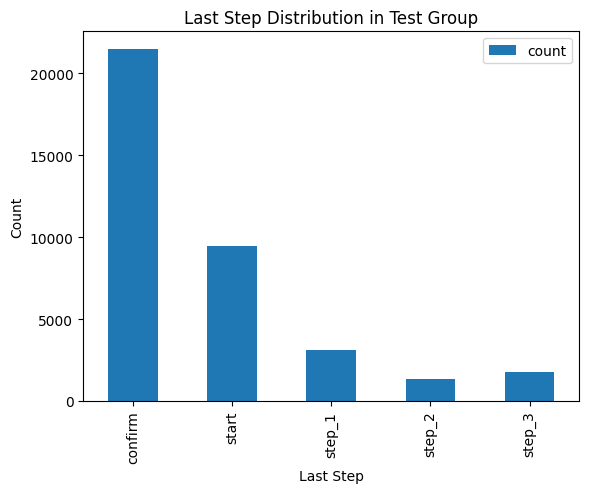

In [41]:
tab_test_last_step.plot(x='last_step', y='count', kind='bar')
plt.xlabel('Last Step')
plt.ylabel('Count')
plt.title('Last Step Distribution in Test Group')
plt.show()

In [42]:

tab_test_gender = cross_table(df_test_final, 'gendr')
tab_test_gender


,gendr,count
0,F,12195
1,M,12661
2,Other,12334


In [43]:
# Calculating the proportions for each value in 'tab_test_last_step' and rounding the results to two decimal places
(tab_test_gender['count'] / tab_test_gender['count'].sum()).round(2)

0    0.33
1    0.34
2    0.33
Name: count, dtype: float64

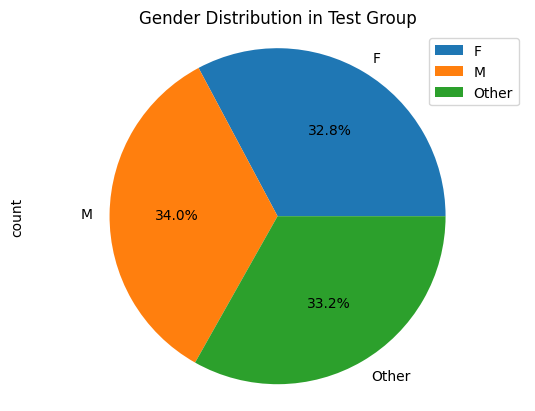

In [44]:
tab_test_gender.plot.pie(y='count', labels=tab_test_gender['gendr'], autopct='%1.1f%%')
plt.title('Gender Distribution in Test Group')
plt.axis('equal')
plt.show()

## Numerical columns

### Centrality and Dispersion Measures

In [45]:
# Extracting column names with numerical data types from the dataframe
df_test_final.select_dtypes("number").columns

Index(['start_time', 'step_1', 'step_2', 'step_3', 'time_completion',
       'navigations_bt_start_last', 'start_step', '1st_step', '2nd_step',
       '3rd_step', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth',
       'total_time_visit'],
      dtype='object')

In [46]:
df_test_final.dtypes

client_id                            object
visit_visitor_id                     object
start_time                          float64
step_1                              float64
step_2                              float64
step_3                              float64
time_completion                     float64
navigations_bt_start_last             int64
completion                             bool
start_step                            int64
1st_step                              int64
2nd_step                              int64
3rd_step                              int64
last_step                            object
variation                            object
clnt_tenure_yr                        int64
clnt_tenure_mnth                      int64
clnt_age                              int64
gendr                                object
num_accts                             int64
bal                                 float64
calls_6_mnth                          int64
logons_6_mnth                   

In [47]:

test_numerical_columns = ['start_time', 'step_1', 'step_2', 'step_3', 'time_completion',
       'navigations_bt_start_last', 'start_step', '1st_step', '2nd_step',
       '3rd_step', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth',
       'total_time_visit']

In [48]:
test_numerical_columns

['start_time',
 'step_1',
 'step_2',
 'step_3',
 'time_completion',
 'navigations_bt_start_last',
 'start_step',
 '1st_step',
 '2nd_step',
 '3rd_step',
 'clnt_tenure_yr',
 'clnt_tenure_mnth',
 'clnt_age',
 'num_accts',
 'bal',
 'calls_6_mnth',
 'logons_6_mnth',
 'total_time_visit']

In [49]:
# Extracting column names with numerical data types from the dataframe
df_test_final.select_dtypes("number").nunique().sort_values(ascending=False)


bal                          26907
total_time_visit              2258
step_3                        1180
start_time                    1178
step_1                         911
step_2                         782
time_completion                768
clnt_tenure_mnth               444
clnt_age                        80
clnt_tenure_yr                  49
navigations_bt_start_last       41
start_step                      21
1st_step                        16
2nd_step                        16
3rd_step                        12
num_accts                        7
calls_6_mnth                     7
logons_6_mnth                    7
dtype: int64

In [50]:
df_test_final.describe()

,start_time,step_1,step_2,step_3,time_completion,navigations_bt_start_last,start_step,1st_step,2nd_step,3rd_step,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth,date,initial_date,total_time_visit,final_date
count,37190.000000,37190.000000,37190.000000,37190.000000,37190.000000,37190.000000,37190.000000,37190.000000,37190.000000,37190.000000,37190.000000,37190.000000,37190.000000,37190.000000,3.719000e+04,37190.000000,37190.000000,37190,37190,37190.000000,37190
mean,1.276011,0.965621,1.177312,1.393163,0.446554,5.089029,1.517935,1.042027,0.832966,0.696101,12.340764,154.133746,48.303522,2.271041,1.701467e+05,3.279591,6.318392,2017-04-18 09:42:53.530519040,2017-04-18 23:58:02.547163392,5.258646,2017-04-19 00:03:18.066039040
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000,2017-03-15 00:00:00,2017-03-15 00:43:23,0.000000,2017-03-15 00:44:38
25%,0.080000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,6.000000,82.000000,34.000000,2.000000,4.140149e+04,1.000000,4.000000,2017-04-04 00:00:00,2017-04-04 10:46:37,0.850000,2017-04-04 10:49:18.249999872
50%,0.200000,0.330000,0.720000,0.380000,0.000000,5.000000,1.000000,1.000000,1.000000,1.000000,11.000000,141.000000,50.000000,2.000000,7.045038e+04,3.000000,6.000000,2017-04-12 00:00:00,2017-04-12 11:39:29.500000,2.800000,2017-04-12 11:46:05
75%,0.850000,0.850000,1.500000,1.200000,0.000000,6.000000,2.000000,1.000000,1.000000,1.000000,16.000000,195.000000,61.000000,2.000000,1.573799e+05,6.000000,9.000000,2017-04-25 00:00:00,2017-04-25 15:09:17.249999872,5.900000,2017-04-25 15:13:05.249999872
max,527.070000,225.580000,299.380000,119.350000,275.030000,73.000000,33.000000,24.000000,24.000000,16.000000,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000,2017-06-20 00:00:00,2017-06-20 23:14:06,527.070000,2017-06-20 23:21:23
std,5.291796,3.028860,3.002591,4.050084,4.175085,2.873297,1.289680,0.921381,0.854312,0.727996,7.058295,84.367085,15.756257,0.553077,4.335104e+05,2.212007,2.196931,NaN,NaN,9.813172,NaN


In [51]:
df_numerical_test = pd.DataFrame(df_test_final[test_numerical_columns]) 

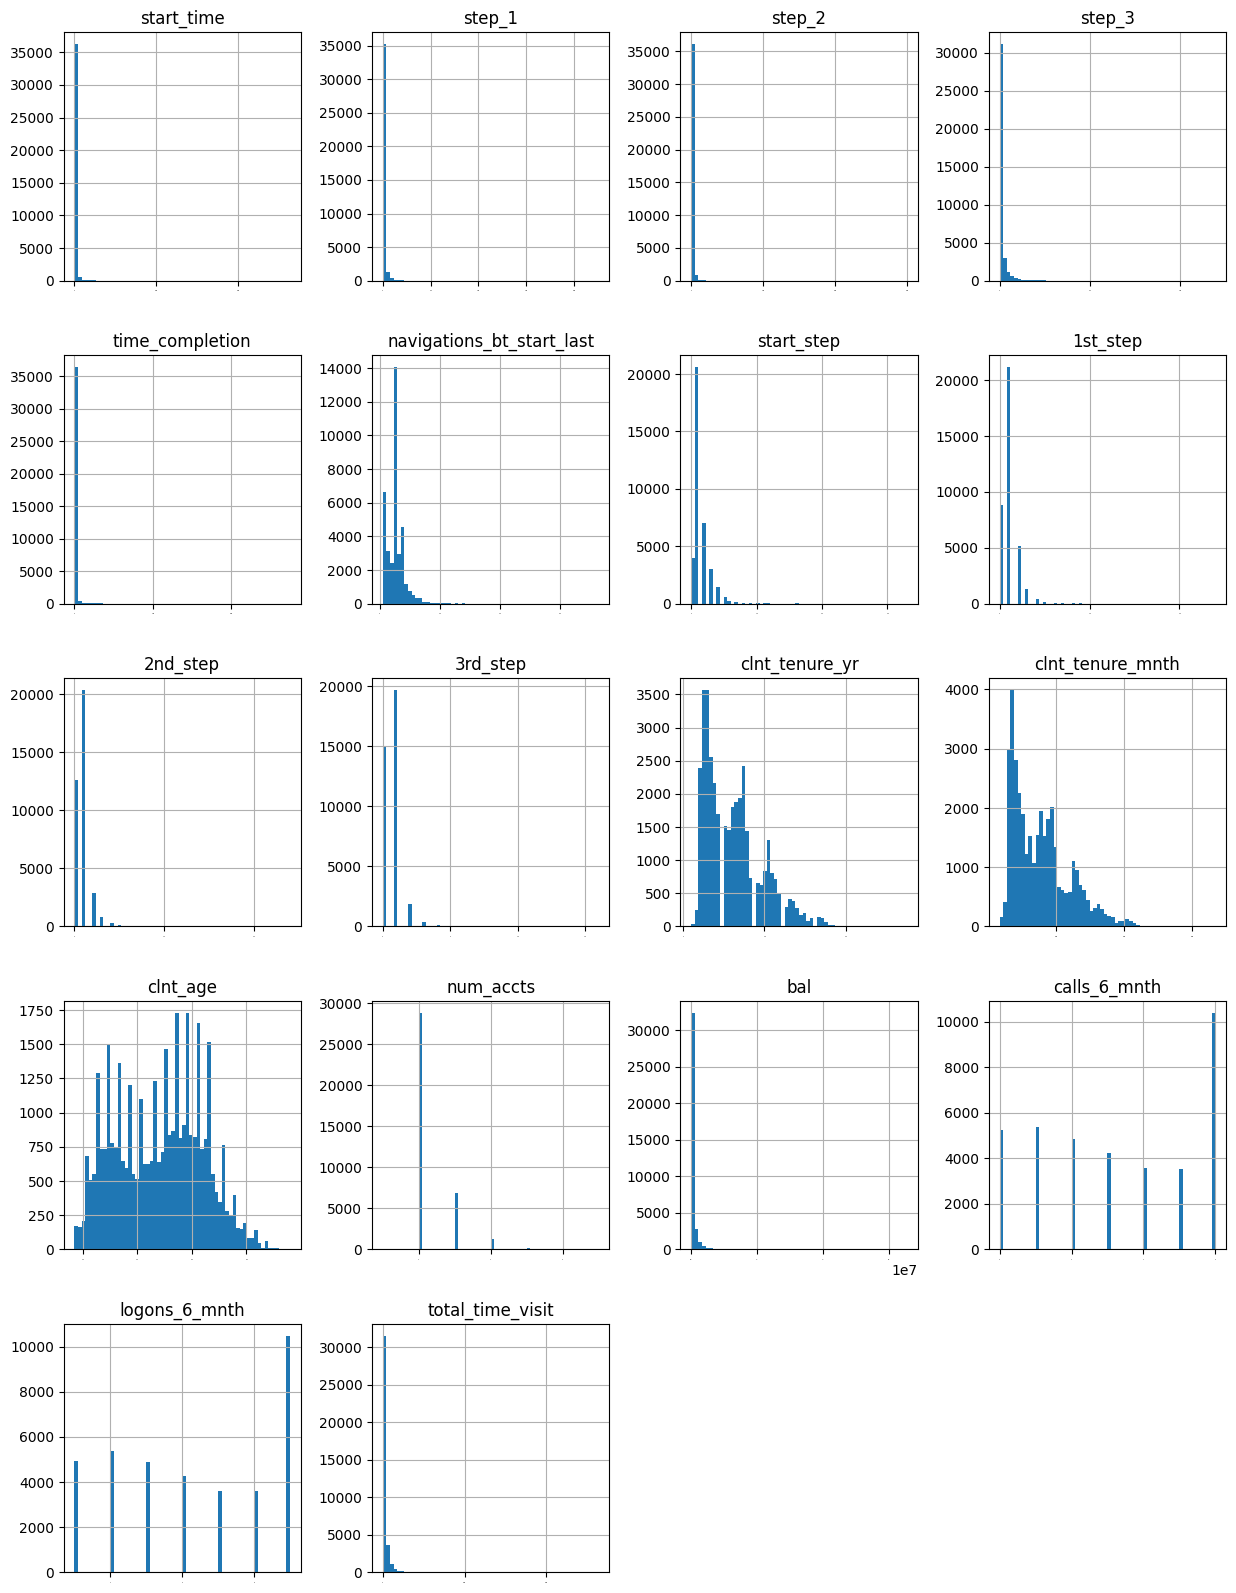

In [52]:
df_numerical_test.hist(figsize=(15, 20), bins=60, xlabelsize=1, ylabelsize=10);

In [53]:
for column in test_numerical_columns:
    df_test_final = remove_outliers_iqr(df_test_final, column)

    df_numerical_test = pd.DataFrame(df_test_final[test_numerical_columns]) 


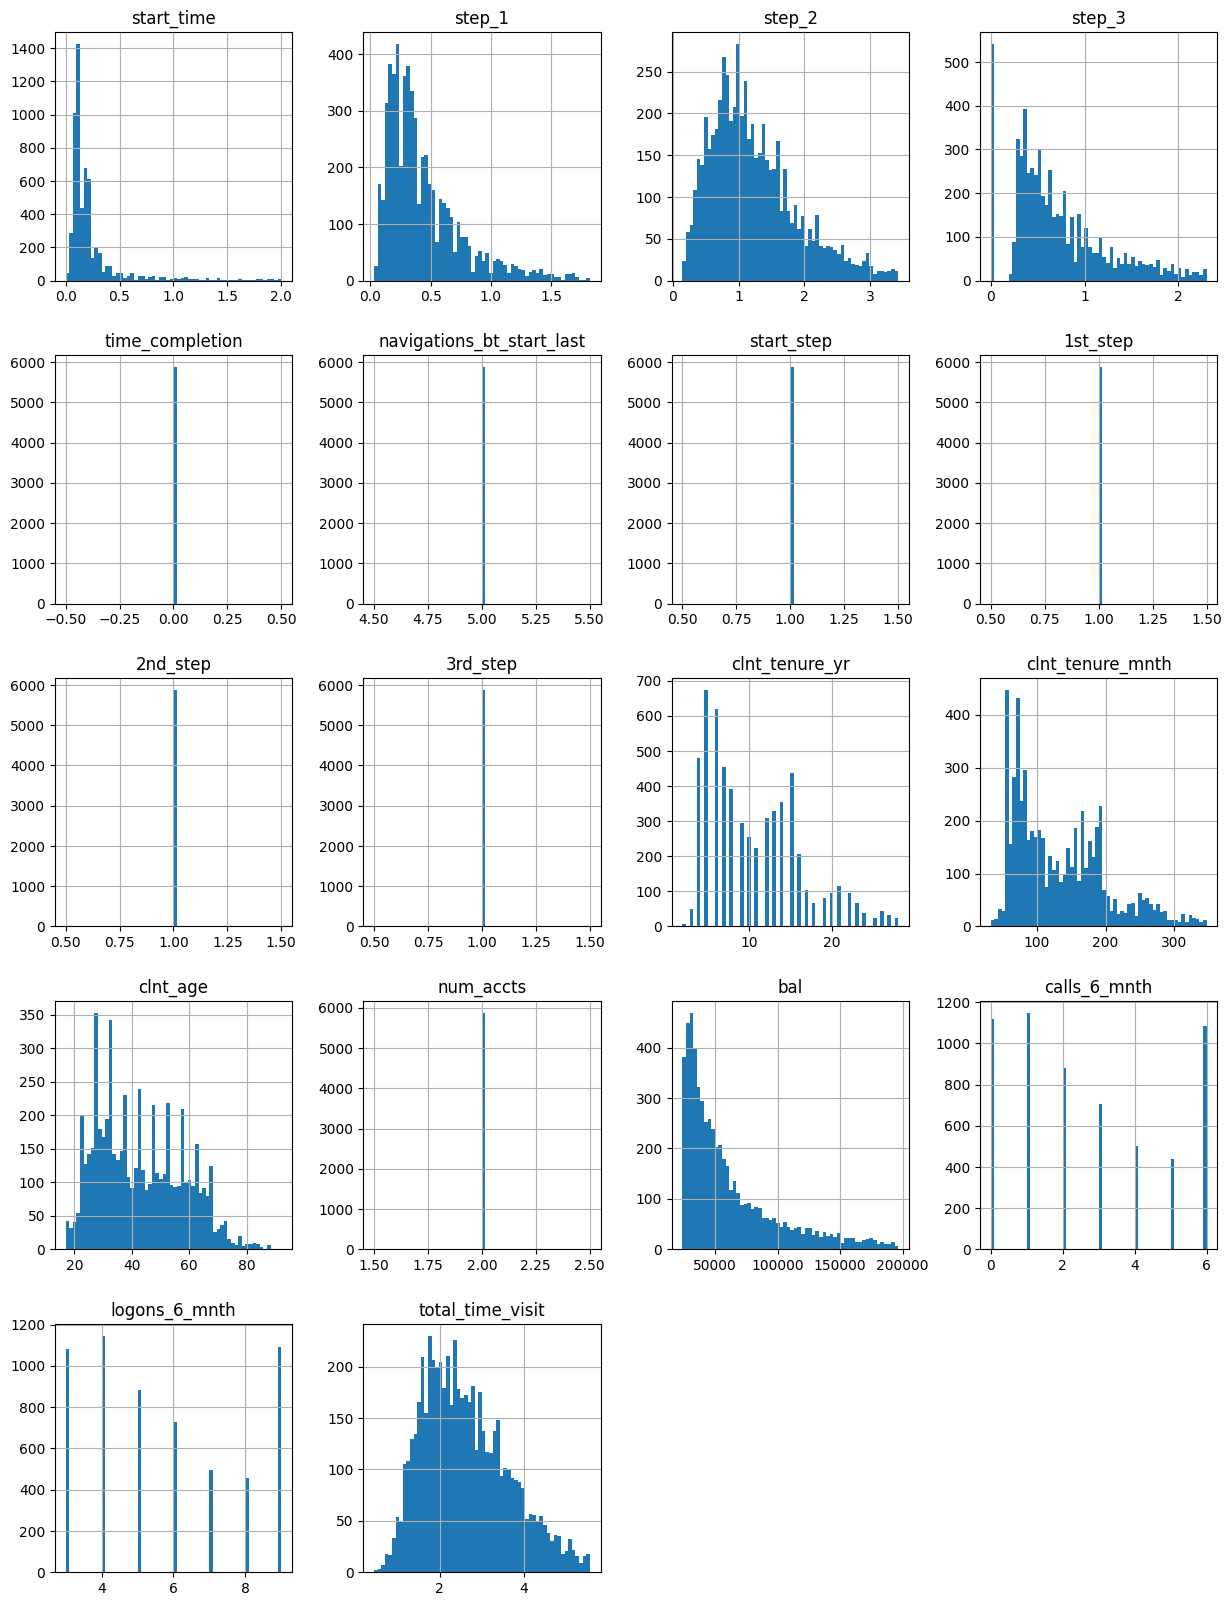

In [54]:
df_numerical_test.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

In [55]:
# List of columns to apply log transformation
log_transform_columns = ['step_1', 'step_2', 'step_3', 'bal', 'total_time_visit']

# Apply log transformation
for column in log_transform_columns:
    df_test_final[column] = np.log1p(df_test_final[column])

# Save the transformed DataFrame
df_test_final.to_csv('transformed_dataset.csv', index=False)


In [56]:
df_test_final = df_test_final.to_csv('../Data/Cleaned_Data/df_test_final.csv', index=False)